In [391]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV, MultiTaskElasticNetCV, MultiTaskElasticNet
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler


np.random.seed(28)

%matplotlib inline

In [392]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [393]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [394]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [395]:
train.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area

In [396]:
train.shape

(2051, 81)

In [397]:
y = train['SalePrice']

In [398]:
def inspection(df):
    print(df.shape)
    print(df.isnull().sum())
    print(df.info)

In [399]:
train.dtypes

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu

In [400]:
inspection(train)

(2051, 81)
Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1


In [401]:
categorical_columns = [col for col in train.columns.values if train[col].dtype == 'object']
train_cat = train[categorical_columns]

In [402]:
train_cat.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type
0,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
1,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD


In [403]:
train_num = train.drop(categorical_columns, axis=1)
train_num.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500


In [404]:
train_len = train_num.shape[0]

for col in train_num.columns.values:
    missing_values = train_num[col].isnull().sum()
    print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/train_len*100))

Id - missing values: 0 (0.00%)
PID - missing values: 0 (0.00%)
MS SubClass - missing values: 0 (0.00%)
Lot Frontage - missing values: 330 (16.09%)
Lot Area - missing values: 0 (0.00%)
Overall Qual - missing values: 0 (0.00%)
Overall Cond - missing values: 0 (0.00%)
Year Built - missing values: 0 (0.00%)
Year Remod/Add - missing values: 0 (0.00%)
Mas Vnr Area - missing values: 22 (1.07%)
BsmtFin SF 1 - missing values: 1 (0.05%)
BsmtFin SF 2 - missing values: 1 (0.05%)
Bsmt Unf SF - missing values: 1 (0.05%)
Total Bsmt SF - missing values: 1 (0.05%)
1st Flr SF - missing values: 0 (0.00%)
2nd Flr SF - missing values: 0 (0.00%)
Low Qual Fin SF - missing values: 0 (0.00%)
Gr Liv Area - missing values: 0 (0.00%)
Bsmt Full Bath - missing values: 2 (0.10%)
Bsmt Half Bath - missing values: 2 (0.10%)
Full Bath - missing values: 0 (0.00%)
Half Bath - missing values: 0 (0.00%)
Bedroom AbvGr - missing values: 0 (0.00%)
Kitchen AbvGr - missing values: 0 (0.00%)
TotRms AbvGrd - missing values: 0 (0.0

In [405]:
train_cat_len = train_cat.shape[0]

for col in train_cat.columns.values:
    cat_missing_values = train_cat[col].isnull().sum()
    print("{} - missing values: {} ({:0.2f}%)".format(col, cat_missing_values, cat_missing_values/train_cat_len*100))

MS Zoning - missing values: 0 (0.00%)
Street - missing values: 0 (0.00%)
Alley - missing values: 1911 (93.17%)
Lot Shape - missing values: 0 (0.00%)
Land Contour - missing values: 0 (0.00%)
Utilities - missing values: 0 (0.00%)
Lot Config - missing values: 0 (0.00%)
Land Slope - missing values: 0 (0.00%)
Neighborhood - missing values: 0 (0.00%)
Condition 1 - missing values: 0 (0.00%)
Condition 2 - missing values: 0 (0.00%)
Bldg Type - missing values: 0 (0.00%)
House Style - missing values: 0 (0.00%)
Roof Style - missing values: 0 (0.00%)
Roof Matl - missing values: 0 (0.00%)
Exterior 1st - missing values: 0 (0.00%)
Exterior 2nd - missing values: 0 (0.00%)
Mas Vnr Type - missing values: 22 (1.07%)
Exter Qual - missing values: 0 (0.00%)
Exter Cond - missing values: 0 (0.00%)
Foundation - missing values: 0 (0.00%)
Bsmt Qual - missing values: 55 (2.68%)
Bsmt Cond - missing values: 55 (2.68%)
Bsmt Exposure - missing values: 58 (2.83%)
BsmtFin Type 1 - missing values: 55 (2.68%)
BsmtFin Type

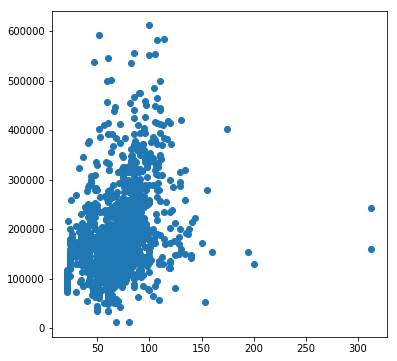

In [406]:
plt.figure(figsize=(6, 6))
plt.scatter(x=train_num['Lot Frontage'], y=y)

In [407]:
train_corr = train.corr()

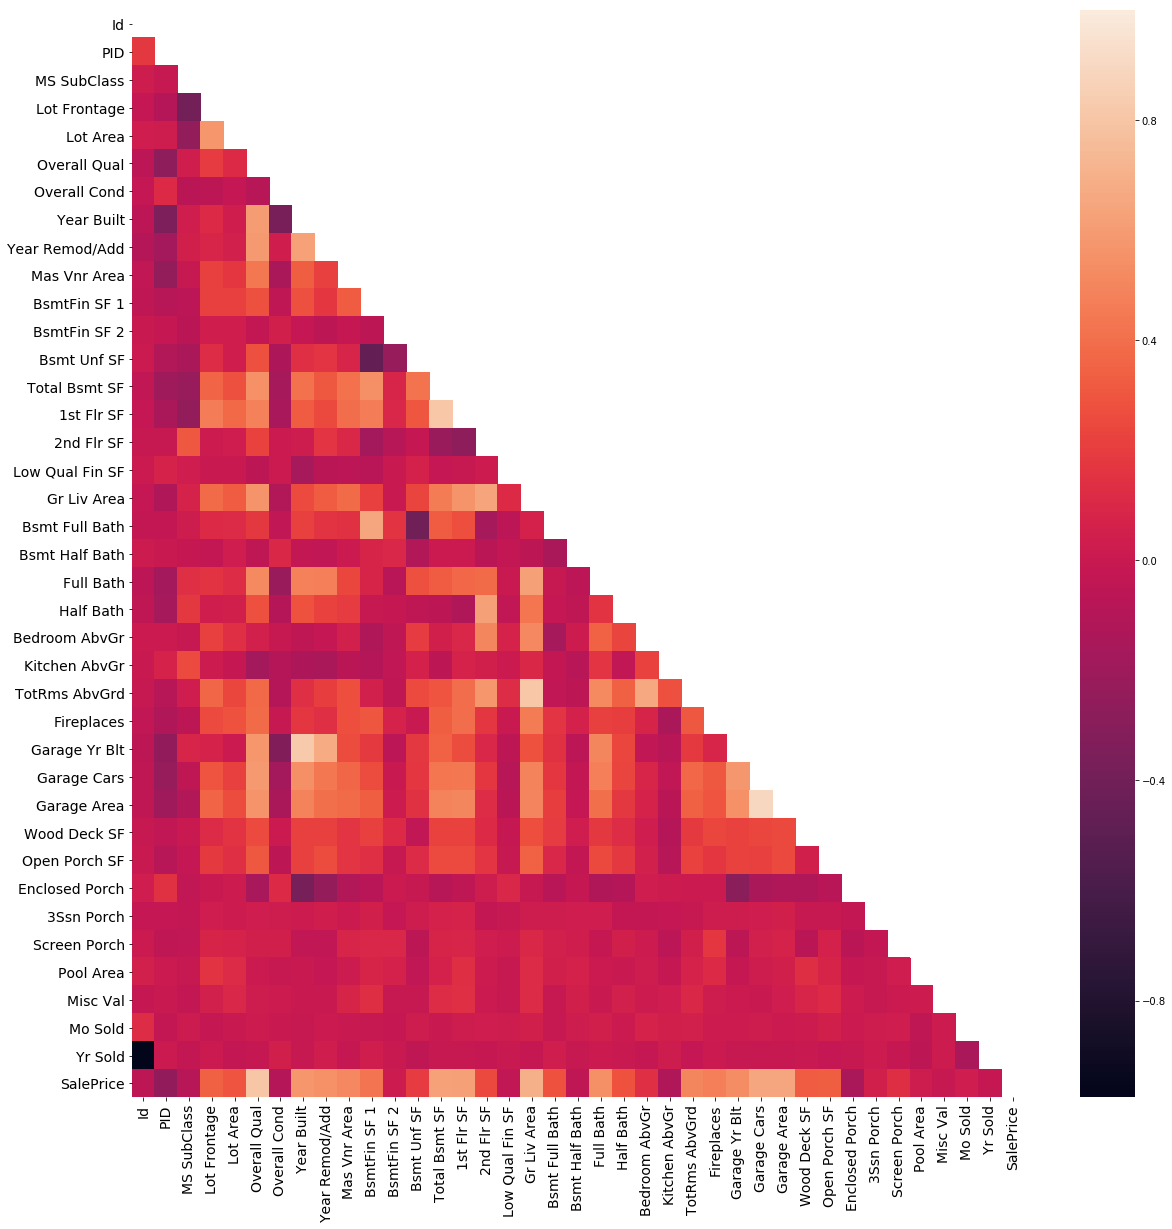

In [408]:
fix, ax = plt.subplots(figsize=(20,20))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(train_corr, mask=mask, ax=ax)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [409]:
train.drop(['Lot Frontage'], axis=1, inplace=True)

In [410]:
train.drop(['Alley'], axis=1, inplace=True)

In [411]:
train['Mas Vnr Type'].unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

In [412]:
train_num.corr()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Id,1.000000,0.175793,0.026543,-0.024967,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035493,-0.045878,0.000723,0.008555,-0.038346,-0.022650,-0.008388,0.011719,-0.023881,-0.033385,0.014381,-0.059086,-0.042054,0.010605,-0.002400,-0.009092,-0.037560,-0.050730,-0.048666,-0.045201,-0.009045,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398
PID,0.175793,1.000000,-0.003632,-0.091291,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.247959,-0.086522,-0.013144,-0.111281,-0.203795,-0.145862,-0.005598,0.072268,-0.112936,-0.030554,-0.001946,-0.179370,-0.163975,0.009122,0.068416,-0.084999,-0.120710,-0.251257,-0.228368,-0.200891,-0.041221,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052
MS SubClass,0.026543,-0.003632,1.000000,-0.389790,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.004047,-0.060854,-0.068265,-0.139911,-0.226038,-0.246212,0.305771,0.031091,0.068210,0.025055,-0.017249,0.142087,0.179404,-0.003516,0.252111,0.034490,-0.055118,0.084954,-0.049148,-0.108228,0.001622,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335
Lot Frontage,-0.024967,-0.091291,-0.389790,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,0.214178,0.036740,0.127605,0.356584,0.463900,0.013700,-0.000300,0.383856,0.111441,-0.030858,0.152812,0.035842,0.220414,0.015856,0.362704,0.253456,0.067865,0.297143,0.358457,0.115180,0.184958,-0.003302,0.031855,0.074819,0.156575,0.051676,-0.017389,0.009112,0.341842
Lot Area,0.032872,0.024135,-0.245484,0.574024,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,0.215430,0.041717,0.041184,0.277175,0.381593,0.029398,0.001273,0.327427,0.116128,0.029980,0.125601,0.049995,0.139060,-0.013484,0.238724,0.289467,0.004882,0.214954,0.263296,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566
Overall Qual,-0.061483,-0.265863,0.035763,0.194808,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,0.278742,-0.028199,0.275773,0.548742,0.477136,0.228152,-0.052338,0.566701,0.175171,-0.047318,0.515080,0.274859,0.053373,-0.170964,0.382025,0.388920,0.574553,0.587423,0.563814,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207
Overall Cond,-0.026096,0.106861,-0.070141,-0.054455,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,-0.045768,0.047810,-0.130521,-0.158643,-0.150938,0.010912,0.004753,-0.109804,-0.039113,0.100324,-0.219189,-0.093266,-0.009908,-0.095725,-0.093576,-0.006463,-0.331765,-0.168513,-0.137917,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019
Year Built,-0.064444,-0.347039,0.035983,0.109504,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,0.275440,-0.021031,0.136662,0.410254,0.323315,0.022313,-0.159403,0.258838,0.215200,-0.031464,0.480169,0.283207,-0.042149,-0.127162,0.137783,0.168848,0.825316,0.542544,0.487177,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849
Year Remod/Add,-0.090040,-0.176666,0.044836,0.085052,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,0.166680,-0.057163,0.160066,0.308545,0.244190,0.159605,-0.066577,0.322407,0.153507,-0.037923,0.471555,0.224106,-0.019748,-0.135926,0.202397,0.138858,0.674024,0.441796,0.398999,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370
Mas Vnr Area,-0.035493,-0.247959,-0.004047,0.218218,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,0.321807,-0.016756,0.085853,0.4085

In [413]:
train['Garage Yr Blt'].describe()

count    1937.000000
mean     1978.707796
std        25.441094
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2207.000000
Name: Garage Yr Blt, dtype: float64

In [414]:
def yeartocat(year):
    if year != year:
        return 0
    elif year < 1961:
        return 1
    elif year < 1980:
        return 2
    elif year < 2002:
        return 3
    else:
        return 4

In [415]:
train['Garage Yr Blt'] = train['Garage Yr Blt'].map(yeartocat)

In [416]:
pd.set_option('display.max_columns', 500)

In [417]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,3,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,4,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [418]:
dummy_garage = pd.get_dummies(train['Garage Yr Blt'], prefix='Garage Yr Blt', drop_first=True)

In [419]:
train = pd.concat([train, dummy_garage], axis=1, join_axes=[train.index])

In [420]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage Yr Blt_1,Garage Yr Blt_2,Garage Yr Blt_3,Garage Yr Blt_4
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,0,1,0,0
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,3,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,0,0,1,0
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000,1,0,0,0
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,4,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000,0,0,0,1
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500,1,0,0,0


In [421]:
train.drop(['Garage Yr Blt'], axis=1, inplace=True)

In [422]:
train['Pool QC'].unique()

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [423]:
train['Pool QC'].fillna('None', inplace=True)
#g[cat_column_name] = g[cat_column_name].cat.add_categories([1])
#g = g.cat.add_categories([1])

In [424]:
train['Pool QC'].unique()

array(['None', 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

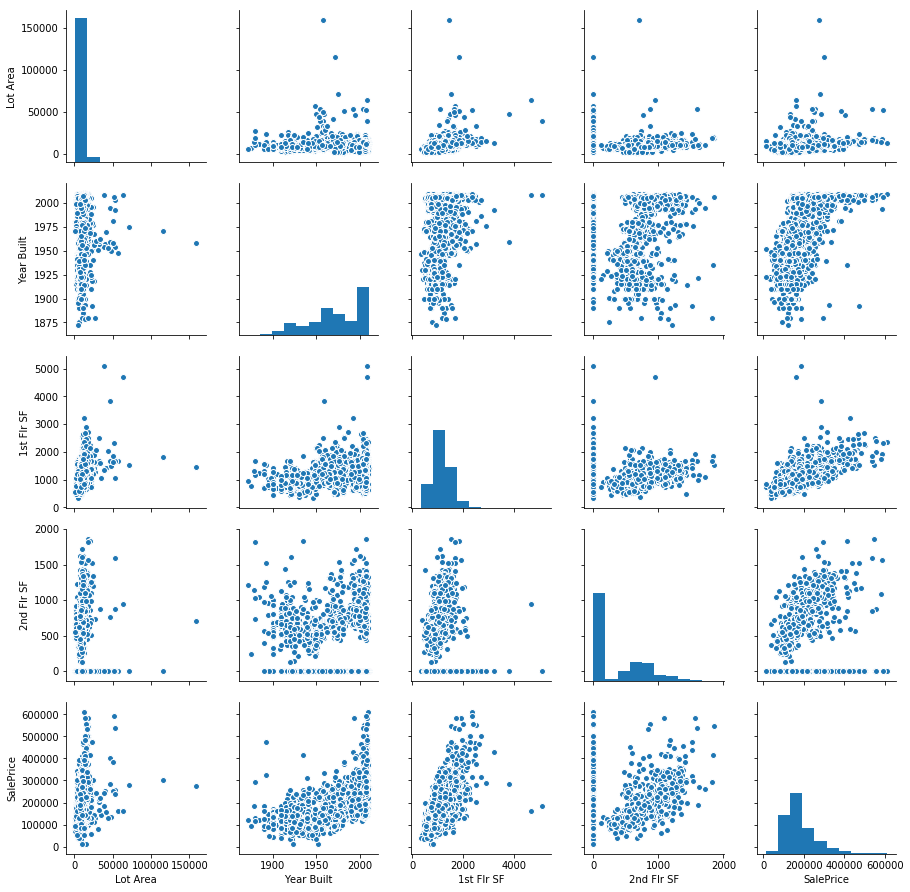

In [425]:
sns.pairplot(train[['Lot Area', 'House Style', 'Neighborhood', 'Year Built', '1st Flr SF', '2nd Flr SF', 'SalePrice']])

In [426]:
dummy_NHood = pd.get_dummies(train['Neighborhood'], prefix='NHood')

In [427]:
train = pd.concat([train, dummy_NHood], axis=1, join_axes=[train.index])

In [428]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage Yr Blt_1,Garage Yr Blt_2,Garage Yr Blt_3,Garage Yr Blt_4,NHood_Blmngtn,NHood_Blueste,NHood_BrDale,NHood_BrkSide,NHood_ClearCr,NHood_CollgCr,NHood_Crawfor,NHood_Edwards,NHood_Gilbert,NHood_Greens,NHood_GrnHill,NHood_IDOTRR,NHood_Landmrk,NHood_MeadowV,NHood_Mitchel,NHood_NAmes,NHood_NPkVill,NHood_NWAmes,NHood_NoRidge,NHood_NridgHt,NHood_OldTown,NHood_SWISU,NHood_Sawyer,NHood_SawyerW,NHood_Somerst,NHood_StoneBr,NHood_Timber,NHood_Veenker
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,None,NaN,NaN,0,3,2010,WD,130500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,None,NaN,NaN,0,4,2009,WD,220000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,None,NaN,NaN,0,1,2010,WD,109000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,None,NaN,NaN,0,4,2010,WD,174000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,None,NaN,NaN,0,3,2010,WD,138500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [429]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage Yr Blt_1,Garage Yr Blt_2,Garage Yr Blt_3,Garage Yr Blt_4,NHood_Blmngtn,NHood_Blueste,NHood_BrDale,NHood_BrkSide,NHood_ClearCr,NHood_CollgCr,NHood_Crawfor,NHood_Edwards,NHood_Gilbert,NHood_Greens,NHood_GrnHill,NHood_IDOTRR,NHood_Landmrk,NHood_MeadowV,NHood_Mitchel,NHood_NAmes,NHood_NPkVill,NHood_NWAmes,NHood_NoRidge,NHood_NridgHt,NHood_OldTown,NHood_SWISU,NHood_Sawyer,NHood_SawyerW,NHood_Somerst,NHood_StoneBr,NHood_Timber,NHood_Veenker
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,None,NaN,NaN,0,3,2010,WD,130500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,None,NaN,NaN,0,4,2009,WD,220000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,None,NaN,NaN,0,1,2010,WD,109000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,None,NaN,NaN,0,4,2010,WD,174000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,None,NaN,NaN,0,3,2010,WD,138500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [430]:
'NHood_Blueste' 'NHood_BrDale' 'NHood_BrkSide' 'NHood_ClearCr' 'NHood_CollgCr' 
'NHood_Crawfor' 'NHood_Edwards' 'NHood_Gilbert' 'NHood_Greens' 
'NHood_GrnHill' 'NHood_IDOTRR' 'NHood_Landmrk' 'NHood_MeadowV' 'NHood_Mitchel' 
'NHood_NAmes' 'NHood_NPkVill' 'NHood_NWAmes' 'NHood_NoRidge' 
'NHood_NridgHt' 'NHood_OldTown' 'NHood_SWISU' 'NHood_Sawyer'
'NHood_SawyerW' 'NHood_Somerst' 'NHood_StoneBr' 'NHood_Timber' 'NHood_Veenker'

'NHood_SawyerWNHood_SomerstNHood_StoneBrNHood_TimberNHood_Veenker'

In [431]:
train[train['NHood_BrkSide'] == 1]

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage Yr Blt_1,Garage Yr Blt_2,Garage Yr Blt_3,Garage Yr Blt_4,NHood_Blmngtn,NHood_Blueste,NHood_BrDale,NHood_BrkSide,NHood_ClearCr,NHood_CollgCr,NHood_Crawfor,NHood_Edwards,NHood_Gilbert,NHood_Greens,NHood_GrnHill,NHood_IDOTRR,NHood_Landmrk,NHood_MeadowV,NHood_Mitchel,NHood_NAmes,NHood_NPkVill,NHood_NWAmes,NHood_NoRidge,NHood_NridgHt,NHood_OldTown,NHood_SWISU,NHood_Sawyer,NHood_SawyerW,NHood_Somerst,NHood_StoneBr,NHood_Timber,NHood_Veenker
77,1350,903235100,30,RM,6324,Pave,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Feedr,RRNn,1Fam,1Story,4,6,1927,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,520.0,520.0,GasA,Fa,N,SBrkr,520,0,0,520,0.0,0.0,1,0,1,1,Fa,4,Typ,0,NaN,Detchd,Unf,1.0,240.0,Fa,TA,Y,49,0,87,0,0,0,None,NaN,NaN,0,5,2008,WD,68500,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112,1345,903232090,50,RM,6240,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,7,1930,1992,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0.0,Unf,0.0,1078.0,1078.0,GasA,TA,Y,SBrkr,1128,445,0,1573,0.0,0.0,2,0,3,1,TA,8,Typ,1,Gd,Detchd,Unf,2.0,360.0,TA,TA,P,0,0,0,0,0,0,None,NaN,NaN,0,6,2008,WD,162900,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145,2020,903233180,50,RM,6240,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,6,1931,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,Fa,No,LwQ,425.0,Unf,0.0,459.0,884.0,GasA,TA,Y,FuseA,959,408,0,1367,0.0,0.0,1,0,3,1,TA,6,Typ,1,Gd,Detchd,Unf,1.0,560.0,TA,TA,Y,0,0,0,0,120,0,None,NaN,NaN,0,11,2007,WD,127500,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
158,2688,903425340,190,RL,9873,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Norm,2fmCon,1Story,4,5,1970,1970,Gable,CompShg,HdBoard,HdBoard,BrkFace,160.0,TA,TA,CBlock,TA,TA,Av,ALQ,789.0,Unf,0.0,171.0,960.0,GasW,TA,N,SBrkr,960,0,0,960,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,Unf,2.0,576.0,TA,TA,Y,0,288,0,0,0,0,None,NaN,NaN,0,5,2006,WD,129000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
171,2024,903401070,50,RL,8850,Pave,Reg,Bnk,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,7,1920,1950,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,Gd,PConc,TA,TA,No,Unf,0.0,Unf,0.0,768.0,768.0,GasA,Ex,Y,SBrkr,752,624,0,1376,0.0,0.0,1,0,3,1,Gd,7,Typ,0,NaN,Detchd,Unf,2.0,576.0,TA,TA,P,0,54,144,0,0,0,None,NaN,NaN,0,2,2007,WD,165000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
205,199,903232190,50,RM,6240,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,7,1936,1980,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,Fa,No,Rec,276.0,Unf,0.0,252.0,528.0,GasA,Gd,Y,SBrkr,548,492,0,1040,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,Fin,2.0,624.0,TA,TA,P,306,0,32,0,0,0,None,NaN,NaN,0,5,2010,WD,123900,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
252,1223,534453140,70,RL,4882,Pave,IR1,Bnk,AllPub,Inside,Mod,BrkSide,RRAn,Feedr,1Fam,2Story,4,7,1937,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,TA,TA,No,Rec,120.0,Unf,0.0,228.0,348.0,GasA,TA,Y,SBrkr,453,453,0,906,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Basment,Unf,1.0,231.0

In [432]:
train['SalePrice'].mean()

181469.70160897123

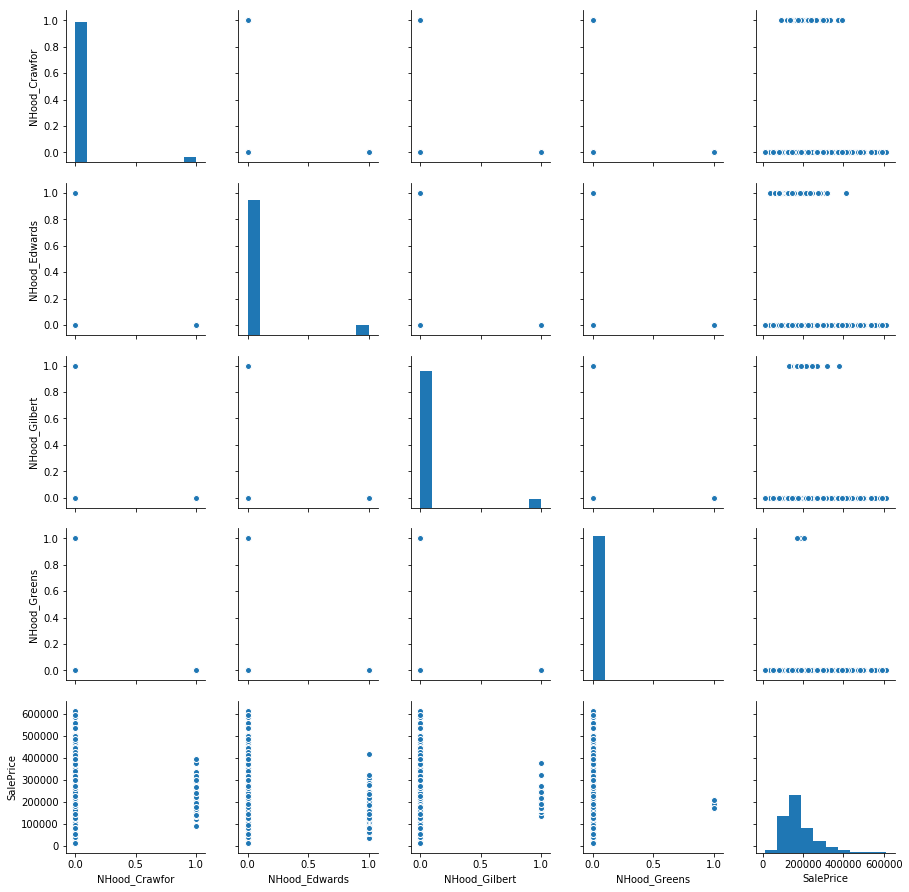

In [433]:
sns.pairplot(train[['NHood_Crawfor', 'NHood_Edwards', 'NHood_Gilbert', 'NHood_Greens', 'SalePrice']])

In [434]:
train['Bsmt Full Bath'].fillna(value=0, inplace=True)

In [435]:
train['Bsmt Full Bath'].unique()

array([0., 1., 2., 3.])

In [436]:
train['Bsmt Half Bath'].fillna(value=0, inplace=True)

In [437]:
train['Bsmt Half Bath'].unique()

array([0., 1., 2.])

In [438]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage Yr Blt_1,Garage Yr Blt_2,Garage Yr Blt_3,Garage Yr Blt_4,NHood_Blmngtn,NHood_Blueste,NHood_BrDale,NHood_BrkSide,NHood_ClearCr,NHood_CollgCr,NHood_Crawfor,NHood_Edwards,NHood_Gilbert,NHood_Greens,NHood_GrnHill,NHood_IDOTRR,NHood_Landmrk,NHood_MeadowV,NHood_Mitchel,NHood_NAmes,NHood_NPkVill,NHood_NWAmes,NHood_NoRidge,NHood_NridgHt,NHood_OldTown,NHood_SWISU,NHood_Sawyer,NHood_SawyerW,NHood_Somerst,NHood_StoneBr,NHood_Timber,NHood_Veenker
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,None,NaN,NaN,0,3,2010,WD,130500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,None,NaN,NaN,0,4,2009,WD,220000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,None,NaN,NaN,0,1,2010,WD,109000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,None,NaN,NaN,0,4,2010,WD,174000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,None,NaN,NaN,0,3,2010,WD,138500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [439]:
train['Fireplace Qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [440]:
train['Total SF'] = train['Total Bsmt SF'] + train['1st Flr SF'] + train['2nd Flr SF']

In [441]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage Yr Blt_1,Garage Yr Blt_2,Garage Yr Blt_3,Garage Yr Blt_4,NHood_Blmngtn,NHood_Blueste,NHood_BrDale,NHood_BrkSide,NHood_ClearCr,NHood_CollgCr,NHood_Crawfor,NHood_Edwards,NHood_Gilbert,NHood_Greens,NHood_GrnHill,NHood_IDOTRR,NHood_Landmrk,NHood_MeadowV,NHood_Mitchel,NHood_NAmes,NHood_NPkVill,NHood_NWAmes,NHood_NoRidge,NHood_NridgHt,NHood_OldTown,NHood_SWISU,NHood_Sawyer,NHood_SawyerW,NHood_Somerst,NHood_StoneBr,NHood_Timber,NHood_Veenker,Total SF
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,None,NaN,NaN,0,3,2010,WD,130500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2204.0
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,None,NaN,NaN,0,4,2009,WD,220000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3035.0
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,None,NaN,NaN,0,1,2010,WD,109000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2114.0
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,None,NaN,NaN,0,4,2010,WD,174000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1828.0
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,None,NaN,NaN,0,3,2010,WD,138500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2121.0


In [442]:
train['Total SF * Quality'] = train['Total SF'] * train['Overall Qual']

In [443]:
train['Total SF * Quality']

0       13224.0
1       21245.0
2       10570.0
3        9140.0
4       12726.0
5       20430.0
6        9714.0
7       11880.0
8        9240.0
9       15600.0
10       8820.0
11      16912.0
12      10080.0
13      20536.0
14      18984.0
15      14300.0
16       9840.0
17      11210.0
18      11670.0
19      16121.0
20       8940.0
21      25280.0
22      27696.0
23      14130.0
24      10560.0
25      17436.0
26       8940.0
27      14400.0
28      14740.0
29       7980.0
         ...   
2021    16765.0
2022    22128.0
2023    19138.0
2024    15848.0
2025    27544.0
2026    17983.0
2027    15560.0
2028    26068.0
2029    35604.0
2030     8148.0
2031    10780.0
2032    15168.0
2033    19056.0
2034    17838.0
2035     7520.0
2036    21560.0
2037     8790.0
2038    12504.0
2039     6552.0
2040    25137.0
2041    38160.0
2042     7312.0
2043    10992.0
2044    14178.0
2045    30912.0
2046    28896.0
2047     6888.0
2048    16854.0
2049     9600.0
2050    19586.0
Name: Total SF * Quality

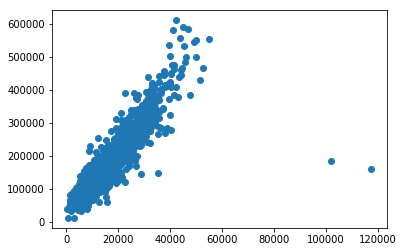

In [444]:
plt.scatter(x=train['Total SF * Quality'], y=train['SalePrice'])

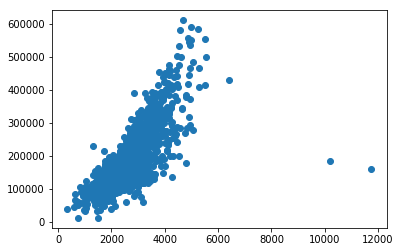

In [445]:
plt.scatter(x=train['Total SF'], y=train['SalePrice'])

In [446]:
train[train['Total SF * Quality'] > 100000]

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage Yr Blt_1,Garage Yr Blt_2,Garage Yr Blt_3,Garage Yr Blt_4,NHood_Blmngtn,NHood_Blueste,NHood_BrDale,NHood_BrkSide,NHood_ClearCr,NHood_CollgCr,NHood_Crawfor,NHood_Edwards,NHood_Gilbert,NHood_Greens,NHood_GrnHill,NHood_IDOTRR,NHood_Landmrk,NHood_MeadowV,NHood_Mitchel,NHood_NAmes,NHood_NPkVill,NHood_NWAmes,NHood_NoRidge,NHood_NridgHt,NHood_OldTown,NHood_SWISU,NHood_Sawyer,NHood_SawyerW,NHood_Somerst,NHood_StoneBr,NHood_Timber,NHood_Veenker,Total SF,Total SF * Quality
960,1499,908154235,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11752.0,117520.0
1885,2181,908154195,20,RL,39290,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,None,NaN,Elev,17000,10,2007,New,183850,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10190.0,101900.0


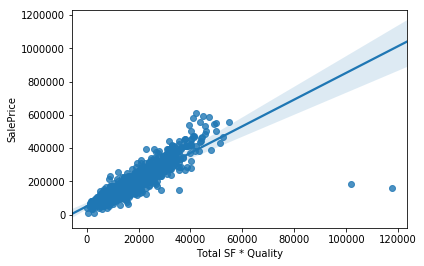

In [447]:
sns.regplot(x=train['Total SF * Quality'], y=train['SalePrice'])

In [448]:
train['Neighborhood']

0        Sawyer
1       SawyerW
2         NAmes
3        Timber
4       SawyerW
5         NAmes
6       Edwards
7         NAmes
8       OldTown
9         NAmes
10       BrDale
11      CollgCr
12      SawyerW
13      Somerst
14      CollgCr
15      Mitchel
16      OldTown
17       Sawyer
18       Sawyer
19      Somerst
20       Sawyer
21      StoneBr
22      NridgHt
23      Gilbert
24      Gilbert
25        NAmes
26       Sawyer
27      Crawfor
28       IDOTRR
29        NAmes
         ...   
2021    CollgCr
2022    Crawfor
2023    NridgHt
2024     NWAmes
2025    NridgHt
2026    Crawfor
2027      NAmes
2028     NWAmes
2029     Timber
2030     IDOTRR
2031      NAmes
2032    Mitchel
2033    Blueste
2034    CollgCr
2035    Crawfor
2036    Somerst
2037     Sawyer
2038      NAmes
2039    MeadowV
2040    ClearCr
2041    NridgHt
2042    Edwards
2043    BrkSide
2044    SawyerW
2045    NridgHt
2046     Timber
2047    Edwards
2048    Crawfor
2049      NAmes
2050    Gilbert
Name: Neighborhood, Leng

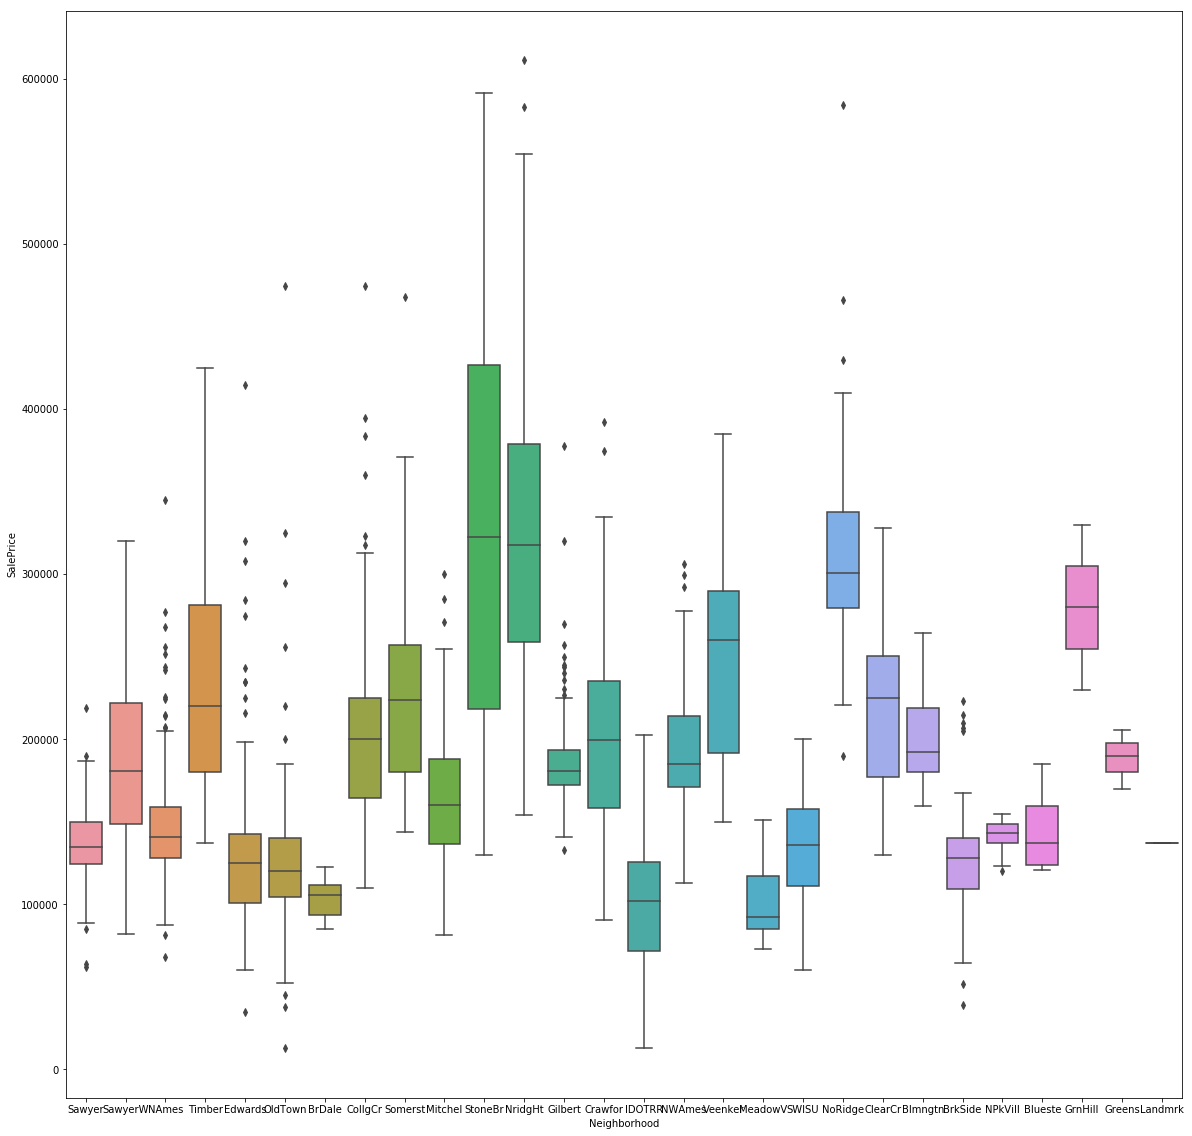

In [449]:
plt.figure(figsize=(20, 20))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train)

In [450]:
Neighborhoods = train['Neighborhood']
Neighborhoods

0        Sawyer
1       SawyerW
2         NAmes
3        Timber
4       SawyerW
5         NAmes
6       Edwards
7         NAmes
8       OldTown
9         NAmes
10       BrDale
11      CollgCr
12      SawyerW
13      Somerst
14      CollgCr
15      Mitchel
16      OldTown
17       Sawyer
18       Sawyer
19      Somerst
20       Sawyer
21      StoneBr
22      NridgHt
23      Gilbert
24      Gilbert
25        NAmes
26       Sawyer
27      Crawfor
28       IDOTRR
29        NAmes
         ...   
2021    CollgCr
2022    Crawfor
2023    NridgHt
2024     NWAmes
2025    NridgHt
2026    Crawfor
2027      NAmes
2028     NWAmes
2029     Timber
2030     IDOTRR
2031      NAmes
2032    Mitchel
2033    Blueste
2034    CollgCr
2035    Crawfor
2036    Somerst
2037     Sawyer
2038      NAmes
2039    MeadowV
2040    ClearCr
2041    NridgHt
2042    Edwards
2043    BrkSide
2044    SawyerW
2045    NridgHt
2046     Timber
2047    Edwards
2048    Crawfor
2049      NAmes
2050    Gilbert
Name: Neighborhood, Leng

In [451]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage Yr Blt_1,Garage Yr Blt_2,Garage Yr Blt_3,Garage Yr Blt_4,NHood_Blmngtn,NHood_Blueste,NHood_BrDale,NHood_BrkSide,NHood_ClearCr,NHood_CollgCr,NHood_Crawfor,NHood_Edwards,NHood_Gilbert,NHood_Greens,NHood_GrnHill,NHood_IDOTRR,NHood_Landmrk,NHood_MeadowV,NHood_Mitchel,NHood_NAmes,NHood_NPkVill,NHood_NWAmes,NHood_NoRidge,NHood_NridgHt,NHood_OldTown,NHood_SWISU,NHood_Sawyer,NHood_SawyerW,NHood_Somerst,NHood_StoneBr,NHood_Timber,NHood_Veenker,Total SF,Total SF * Quality
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,None,NaN,NaN,0,3,2010,WD,130500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2204.0,13224.0
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,None,NaN,NaN,0,4,2009,WD,220000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3035.0,21245.0
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,None,NaN,NaN,0,1,2010,WD,109000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2114.0,10570.0
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,None,NaN,NaN,0,4,2010,WD,174000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1828.0,9140.0
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,None,NaN,NaN,0,3,2010,WD,138500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2121.0,12726.0


In [452]:
train['Neighborhood'].unique()

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

In [453]:
train['NHood_GrnHill'].sum()

2

In [454]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Garage Yr Blt_1,Garage Yr Blt_2,Garage Yr Blt_3,Garage Yr Blt_4,NHood_Blmngtn,NHood_Blueste,NHood_BrDale,NHood_BrkSide,NHood_ClearCr,NHood_CollgCr,NHood_Crawfor,NHood_Edwards,NHood_Gilbert,NHood_Greens,NHood_GrnHill,NHood_IDOTRR,NHood_Landmrk,NHood_MeadowV,NHood_Mitchel,NHood_NAmes,NHood_NPkVill,NHood_NWAmes,NHood_NoRidge,NHood_NridgHt,NHood_OldTown,NHood_SWISU,NHood_Sawyer,NHood_SawyerW,NHood_Somerst,NHood_StoneBr,NHood_Timber,NHood_Veenker,Total SF,Total SF * Quality
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,None,NaN,NaN,0,3,2010,WD,130500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2204.0,13224.0
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,None,NaN,NaN,0,4,2009,WD,220000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3035.0,21245.0
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,None,NaN,NaN,0,1,2010,WD,109000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2114.0,10570.0
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,None,NaN,NaN,0,4,2010,WD,174000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1828.0,9140.0
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,None,NaN,NaN,0,3,2010,WD,138500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2121.0,12726.0


In [455]:
train[['Total SF']].isnull().sum()

Total SF    1
dtype: int64

In [456]:
SF_mean = train['Total SF'].mean()

In [457]:
train['Total SF'].fillna(value=SF_mean, inplace=True)

In [458]:
train['Total SF'].isnull().sum()

0

In [459]:
TSFQ_mean = train['Total SF * Quality'].mean()

In [460]:
train['Total SF * Quality'].fillna(value=TSFQ_mean, inplace=True)

In [461]:
train['Total SF * Quality'].isnull().sum()

0

In [462]:
features = ['Total SF * Quality', 'NHood_Sawyer', 'NHood_SawyerW',
            'NHood_NAmes', 'NHood_Timber', 'NHood_Edwards', 'NHood_OldTown', 
            'NHood_BrDale', 'NHood_CollgCr', 'NHood_Somerst', 
            'NHood_Mitchel', 'NHood_StoneBr', 'NHood_NridgHt', 
            'NHood_Gilbert', 'NHood_Crawfor', 'NHood_IDOTRR', 'NHood_NWAmes', 
            'NHood_Veenker', 'NHood_MeadowV', 'NHood_SWISU', 'NHood_NoRidge', 
            'NHood_ClearCr', 'NHood_Blmngtn', 'NHood_BrkSide', 'NHood_NPkVill', 
            'NHood_Blueste', 'NHood_GrnHill', 'NHood_Greens', 'NHood_Landmrk']
X = train[features]
y = train['SalePrice']

In [463]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)

In [464]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [465]:
X_train_scaled.shape
y.shape

(2051,)

In [466]:
l1_ratios = np.linspace(.01, 1.0, 20)
ENet_cv = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10)
ENet_cv.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=array([0.01   , 0.06211, 0.11421, 0.16632, 0.21842, 0.27053, 0.32263,
       0.37474, 0.42684, 0.47895, 0.53105, 0.58316, 0.63526, 0.68737,
       0.73947, 0.79158, 0.84368, 0.89579, 0.94789, 1.     ]),
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [467]:
ENet_model = ElasticNet(alpha=ENet_cv.alpha_, l1_ratio=ENet_cv.l1_ratio_)
score = cross_val_score(ENet_model, X_train_scaled, y_train)
print(score)
print(np.mean(score))

[0.714295   0.82973997 0.78715948]
0.7770648132160147


# Cleaning Test Data

In [468]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0.0,Unf,0.0,1020.0,1020.0,GasA,Gd,N,FuseP,908,1020,0,1928,0.0,0.0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1.0,440.0,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1967.0,1967.0,GasA,TA,Y,SBrkr,1967,0,0,1967,0.0,0.0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2.0,580.0,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554.0,Unf,0.0,100.0,654.0,GasA,Ex,Y,SBrkr,664,832,0,1496,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2.0,426.0,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,968.0,968.0,GasA,TA,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2.0,480.0,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609.0,Unf,0.0,785.0,1394.0,GasA,Gd,Y,SBrkr,1394,0,0,1394,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2.0,514.0,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [469]:
test.drop(['Lot Frontage'], axis=1, inplace=True)

In [470]:
test.drop(['Alley'], axis=1, inplace=True)

In [471]:
test['Garage Yr Blt'] = test['Garage Yr Blt'].map(yeartocat)

In [472]:
dummy_garage = pd.get_dummies(test['Garage Yr Blt'], prefix='Garage Yr Blt', drop_first=True)

In [473]:
test = pd.concat([test, dummy_garage], axis=1, join_axes=[test.index])

In [474]:
test.drop(['Garage Yr Blt'], axis=1, inplace=True)

In [475]:
test['Pool QC'].fillna('None', inplace=True)

In [476]:
dummy_NHood = pd.get_dummies(train['Neighborhood'], prefix='NHood')

In [477]:
test = pd.concat([test, dummy_NHood], axis=1, join_axes=[test.index])

In [478]:
test['Bsmt Full Bath'].fillna(value=0, inplace=True)

In [479]:
test['Bsmt Half Bath'].fillna(value=0, inplace=True)

In [480]:
test['Total SF'] = test['Total Bsmt SF'] + test['1st Flr SF'] + test['2nd Flr SF']

In [481]:
test['Total SF * Quality'] = test['Total SF'] * test['Overall Qual']

In [482]:
SF_mean = test['Total SF'].mean()

In [483]:
test['Total SF'].fillna(value=SF_mean, inplace=True)

In [484]:
TSFQ_mean = test['Total SF * Quality'].mean()

In [485]:
test['Total SF * Quality'].fillna(value=TSFQ_mean, inplace=True)

# Fitting Test Data

In [486]:
test_scaled = ss.transform(test[features])

In [487]:
test_scaled.shape

(879, 29)

In [488]:
test[features].shape

(879, 29)

In [489]:
X.shape

(2051, 29)

In [490]:
ENet_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=65.93042860930215, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [491]:
ENet_model.score(X_test_scaled, y_test)

0.8383279559556415

In [492]:
predictions = ENet_model.predict(test_scaled)

In [494]:
solution = pd.DataFrame({'SalePrice': predictions}, index=test['Id'])
solution.to_csv('./ENet_824_2pm')

In [497]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Garage Yr Blt_1,Garage Yr Blt_2,Garage Yr Blt_3,Garage Yr Blt_4,NHood_Blmngtn,NHood_Blueste,NHood_BrDale,NHood_BrkSide,NHood_ClearCr,NHood_CollgCr,NHood_Crawfor,NHood_Edwards,NHood_Gilbert,NHood_Greens,NHood_GrnHill,NHood_IDOTRR,NHood_Landmrk,NHood_MeadowV,NHood_Mitchel,NHood_NAmes,NHood_NPkVill,NHood_NWAmes,NHood_NoRidge,NHood_NridgHt,NHood_OldTown,NHood_SWISU,NHood_Sawyer,NHood_SawyerW,NHood_Somerst,NHood_StoneBr,NHood_Timber,NHood_Veenker,Total SF,Total SF * Quality
0,2658,902301120,190,RM,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0.0,Unf,0.0,1020.0,1020.0,GasA,Gd,N,FuseP,908,1020,0,1928,0.0,0.0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,Unf,1.0,440.0,Po,Po,Y,0,60,112,0,0,0,None,NaN,NaN,0,4,2006,WD,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2948.0,17688.0
1,2718,905108090,90,RL,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1967.0,1967.0,GasA,TA,Y,SBrkr,1967,0,0,1967,0.0,0.0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,Fin,2.0,580.0,TA,TA,Y,170,0,0,0,0,0,None,NaN,NaN,0,8,2006,WD,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3934.0,19670.0
2,2414,528218130,60,RL,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554.0,Unf,0.0,100.0,654.0,GasA,Ex,Y,SBrkr,664,832,0,1496,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,RFn,2.0,426.0,TA,TA,Y,100,24,0,0,0,0,None,NaN,NaN,0,9,2006,New,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2150.0,15050.0
3,1989,902207150,30,RM,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,968.0,968.0,GasA,TA,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,Unf,2.0,480.0,Fa,TA,N,0,0,184,0,0,0,None,NaN,NaN,0,7,2007,WD,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1936.0,9680.0
4,625,535105100,20,RL,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609.0,Unf,0.0,785.0,1394.0,GasA,Gd,Y,SBrkr,1394,0,0,1394,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,RFn,2.0,514.0,TA,TA,Y,0,76,0,0,185,0,None,NaN,NaN,0,7,2009,WD,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2788.0,16728.0


In [498]:
test['Bedroom AbvGr'].isnull().sum()

0